# Implementation from Scratch

<br />

I am going to rewrite codes of 3 layers of neural network that I created on the previous sprint to expand them to any structures by using classes.

In [1]:
class ScratchDeepNeuralNetrowkClassifier:
    """
    Implement neural network classifier.
    
    Parameters
    ----------
    num_epoch : int
        Number of epochs
    
    batch_size : int
        Size of batch
    
    verbose : bool
        True if outputting learning process
    
    
    Attributes
    ----------
    loss : list
        List of arrays of records of loss on train dataset
    
    val_loss : list
        List of arrays of records of loss on validation dataset
    
    layers : list
        List of layers
    """
    
    def __init__(self, num_epoch, batch_size, verbose=True):
        # Record hyperparameters as attribute
        self.epoch = num_epoch
        self.batch_size = batch_size
        self.verbose = verbose
        
        # Prepare lists for arrays to record losses
        self.loss = []
        self.val_loss = []
        # Prepare lists for arrays to record losses
        self.layers = []
    
    
    def add(self, layer):
        self.layers += [layer]
    
    
    def forward_layer(self, X):
        for layer in self.layers:
            X = layer.forward(X)
        
        return X
    
    
    def backward_layer(self, y):
        for layer in reversed(self.layers):
            y = layer.backward(y)
        
        return y
    
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Fit neural network classifier.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of train dataset
        
        y : ndarray, shape (n_samples, )
            Correct values of train dataset
        
        X_val : ndarray, shape (n_samples, n_features)
            Features of validation dataset
        
        y_val : ndarray, shape (n_samples, )
            Correct values of validation dataset
        """
        
        # Fit
        if self.verbose:
            count = 0
        
        for i in range(self.epoch):
            # Initialize
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size)
            
            if (X_val is not None) and (y_val is not None):
                get_mini_batch_val = GetMiniBatch(X_val, y_val, batch_size=self.batch_size)
                
                for ((mini_X_train, mini_y_train), (mini_X_val_train, mini_y_val_train)) in zip(get_mini_batch, get_mini_batch_val):
                    # Forwardpropagation per iteration
                    Z3 = self.forward_layer(mini_X_train)
                    Z3_val = self.forward_layer(mini_X_val_train)
                    
                    # Loss
                    if self.verbose:
                        # Initialize
                        loss = Loss()
                        # Compute losses
                        L = loss.cross_entropy_loss(mini_y_train, Z3)
                        L_val = loss.cross_entropy_loss(mini_y_val_train, Z3_val)
                    
                    # Backforwardpropagation per iteration
                    dX = self.backward_layer(mini_y_train)
                    dX_val = self.backward_layer(mini_y_val_train)
            
            
            else:
                for mini_X_train, mini_y_train in get_mini_batch:
                    # Forwardpropagation per iteration
                    Z3 = self.forward_layer(mini_X_train)
                    
                    # Loss
                    if self.verbose:
                        # Initialize
                        loss = Loss()
                        # Compute losses
                        L = loss.cross_entropy_loss(mini_y_train, Z3)
                    
                    # Backforwardpropagation per iteration
                    dX = self.backward_layer(mini_y_train)
            
            
            # Output learning process if verbose is True
            if self.verbose:
                self.loss += [sum(L) / self.batch_size]
                if (X_val is not None) and (y_val is not None):
                    self.val_loss += [sum(L_val) / self.batch_size]
                    print("{0}ep loss: {1}, val_loss: {2}".format(count+1, self.loss[count], self.val_loss[count]))
                else:
                    print(self.loss[count])
                count += 1
    
    
    def predict(self, X):
        """
        Predict by neural network classifier.
        
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Samples
        
        
        Returns
        -------
        ndarray, shape (n_samples, 1)
            Results of prediction
        """
        
        Z3 = self.forward_layer(X)
        
        return np.argmax(Z3, axis=1)
    
    
    def plot_learning_record(self):
        """
        Plot learning records.
        """
        
        plt.figure(facecolor="azure", edgecolor="coral")
        
        plt.plot(self.loss, label="loss")
        plt.plot(self.val_loss, label="val_loss")
        
        plt.title("Learning Records")
        plt.xlabel("Number of Epochs")
        plt.ylabel("Loss")
        plt.grid(True)
        
        plt.legend()
        plt.show()
    
    
    def compute_index_values(self, y, y_pred):
        """
        Compute Index values.
        
        Parameters
        ----------
        X: ndarray, shape(n_samples,n_features)
            Features of train dataset
        
        y: ndarray, shape(n_samples,)
            Correct values of train dataset
        """
        
        print("accuracy score:", accuracy_score(y, y_pred))
    
    
    def plot_misclassification(self, X_val, y_val, y_pred):
        """
        Plot results of misclassification. Show "Results of prediction/Corrects" above images.

        Parameters
        ----------
        y_pred : ndarray, shape (n_samples,)
            Results of prediction
        
        y_val : ndarray, shape (n_samples,)
            Correct labels of validation data
        
        X_val : ndarray, shape (n_samples, n_features)
            Features of validation data
        """
        
        # Number of results I want to plot
        num = 36

        true_false = y_pred==y_val
        false_list = np.where(true_false==False)[0].astype(np.int)

        if false_list.shape[0] < num:
            num = false_list.shape[0]
        fig = plt.figure(figsize=(6, 6))
        fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
        for i in range(num):
            ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
            ax.set_title("{} / {}".format(y_pred[false_list[i]],y_val[false_list[i]]))
            ax.imshow(X_val.reshape(-1,28,28)[false_list[i]], cmap='gray')

## [Task 1] Class Fully Connected Layer

In [2]:
class FC:
    """
    Fully connected layer from a layer of n_nodes1 to a layer of n_nodes2
    
    Parameters
    ----------
    n_nodes1 : int
        Number of nodes of the previous layer
    
    n_nodes2 : int
        Number of nodes of the following layer
    
    initializer : Instance
        Instance of initialization method
    
    optimizer : Instance
        Instance of optimisation method
    
    
    Attributes
    ----------
    W : ndarray, shape (n_nodes1, n_nodes2)
        Weight
    
    B : ndarray, shape (n_nodes2,)
        Bias
    
    Z : ndarray, shape (batch_size, n_nodes1)
        Deepcopy of input
    
    dW : float
        Gradient of weight
    
    dB : float
        Gradient of bias
    """
    
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.initializer = initializer
        self.optimizer = optimizer
        
        # Initialize self.W and self.B by using initializer method
        self.W = self.initializer.W(self.n_nodes1, self.n_nodes2)
        self.B = self.initializer.B(self.n_nodes2)
        
        self.Z = 0
        self.dW = 0
        self.dB = 0
    
    
    def forward(self, X):
        """
        Forwardpropagation
        
        Parameters
        ----------
        X : ndarray, shape (batch_size, n_nodes1)
            Input
        
        
        Returns
        ----------
        ndarray, shape (batch_size, n_nodes2)
            Output
        """        
        
        self.Z = copy.deepcopy(X)
        
        return np.dot(X, self.W) + self.B
    
    
    def backward(self, dA):
        """
        Backwardpropagation
        
        Parameters
        ----------
        dA : ndarray, shape (batch_size, n_nodes2)
            Gradient given from the following layer
        
        
        Returns
        ----------
        dZ : ndarray, shape (batch_size, n_nodes1)
            Gradient given to the next layer
        """
        
        self.dB = np.average(dA)
        self.dW = np.dot(self.Z.T, dA) / dA.shape[0]
        
        dZ = np.dot(dA, self.W.T)
        
        # Update
        self = self.optimizer.update(self)
        
        return dZ

## [Task 2] Class Initialization Method

In [3]:
class SimpleInitializer:
    """
    Simple initialization by Gaussian distribution
    
    Parameters
    ----------
    sigma : float
        Standard deviation of Gaussian distribution
    """
    
    def __init__(self, sigma):
        self.sigma = sigma
    
    
    def W(self, n_nodes1, n_nodes2):
        """
        Initialize a weight.

        Parameters
        ----------
        n_nodes1 : int
            Number of nodes of the previous layer

        n_nodes2 : int
            Number of nodes of the following layer


        Returns
        ----------
        W : ndarray, shape (n_nodes1, n_nodes2)
            Weight
        """

        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        
        return W.astype("f")
    
    
    def B(self, n_nodes2):
        """
        Initialize a bias.

        Parameters
        ----------
        n_nodes2 : int
            Number of nodes of the following layer
        
        
        Returns
        ----------
        B : ndarray, shape (n_nodes2,)
            Bias
        """

        B = self.sigma * np.random.randn(1, n_nodes2)
        
        return B.astype("f")

## [Task 3] Class Optimization Method

In [4]:
class SGD:
    """
    Stochastic Gradient Descent
    
    Parameters
    ----------
    lr : float
        Learning rate
    """
    
    def __init__(self, lr):
        self.lr = lr
    
    
    def update(self, layer):
        """
        Update weights and biases of layers.
        
        Parameters
        ----------
        layer : Instance
            Instance of preupdated layer
        
        
        Returns
        ----------
        layer : Instance
            Instance of updated layer
        """
        
        layer.W -= self.lr * layer.dW
        layer.B -= self.lr * layer.dB
        
        return layer

## [Task 4] Class Activation Function

In [5]:
class Sigmoid:
    """
    Sigmoid function
    """
    
    def forward(self, A):
        """
        Forwardpropagation
        
        Parameters
        ----------
        A : ndarray, shape (batch_size,)
            Vector from the previous layer of kth class
        
        
        Returns
        -------
        ndarray, shape (batch_size, ith n_nodes)
            Output
        """
        
        self.A = A
        
        return 1 / (1+np.exp(-self.A))
    
    
    def backward(self, dA):
        """
        Backpropagation
        
        Paramaters
        ----------
        dA : ndarray, shape (batch_size, n_nodes2)
            Gradient given from the following layer
        
        
        Returns
        -------
        ndarray, shape (batch_size, ith n_nodes)
            Output
        """
        
        Z = self.forward(self.A)
        
        return Z * (1-Z) * dA

In [6]:
class Tanh:
    """
    tanh function
    """
    
    def forward(self, A):
        """
        Forwardpropagation
        
        Parameters
        ----------
        A : ndarray, shape (batch_size,)
            Vector from the previous layer of kth class
        
        
        Returns
        -------
        ndarray, shape (batch_size, ith n_nodes)
            Output
        """
        
        self.A = A
        
        return np.tanh(self.A)
    
    
    def backward(self, dA):
        """
        Backpropagation
        
        Parameters
        ----------
        dA : ndarray, shape (batch_size, n_nodes2)
            Gradient given from the following layer
        
        
        Returns
        -------
        ndarray, shape (batch_size, ith n_nodes)
            Output
        """
        
        Z = self.forward(self.A)
        
        return (1-Z**2) * dA

In [7]:
class Softmax:
    """
    Softmax function
    
    Attributes
    ----------
    Z : ndarray, shape (batch_size, ith n_nodes)
        Output
    """
    
    def __init__(self):
        self.Z = None
    
    
    def forward(self, A):
        """
        Forwardpropagation
        
        Parameters
        ----------
        A : ndarray, shape (batch_size,)
            Vector from the previous layer of kth class
        
        
        Returns
        -------
        ndarray, shape (batch_size, ith n_nodes)
            Output
        """
        
        A -= np.max(A)
        
        Z = np.exp(A) / np.sum(np.exp(A), axis=1, keepdims=True)
        
        self.Z = Z
        
        return Z
    
    
    def backward(self, y):
        """
        Backwardpropagation
        
        Parameters
        ----------
        y : ndarray, shape (n_samples, 1)
            Correct values
        
        
        Returns
        -------
        ndarray, shape (batch_size,)
            Probability vector of kth class
        """
        
        return self.Z - y

## [Task 5] Create a Class of ReLU

<br />

$$
% <![CDATA[
f(x) = ReLU(x) = \begin{cases}
x  & \text{if $x>0$,}\\
0 & \text{if $x\leqq0$.}
\end{cases} %]]>
$$

$x$ : a feature (scaler)

<br />

In addition, the following equation is a differentiation of $f(x)$ with respect to $x$ for backpropagation.

$$
% <![CDATA[
\frac{\partial f(x)}{\partial x} = \begin{cases}
1  & \text{if $x>0$,}\\
0 & \text{if $x\leqq0$.}
\end{cases} %]]>
$$

In [8]:
class Relu:
    """
    ReLU function
    """
    
    def forward(self, A):
        """
        Forwardpropagation
        
        Parameters
        ----------
        A : ndarray, shape (batch_size,)
            Vector from the previous layer of kth class
        
        
        Returns
        -------
        ndarray, shape (batch_size, ith n_nodes)
            Output
        """
        
        self.A = A
        
        return np.where(self.A<=0, 0, self.A)
    
    
    def backward(self, dA):
        """
        Backpropagation
        
        Parameters
        ----------
        dA : ndarray, shape (batch_size, n_nodes2)
            Gradient given from the following layer
        
        
        Returns
        -------
        ndarray, shape (batch_size, ith n_nodes)
            Output
        """
        
        return np.where(self.A<=0, 0, 1) * dA

## [Task 6] Initial Value of Weight

<br />

Xavier's initial value

$$
\sigma = \frac{1}{\sqrt{n}}
$$

$n$ : Number of nodes of the previous layer

<br />

He's initial value

$$
\sigma = \sqrt{\frac{2}{n}}
$$

$n$ : Number of nodes of the previous layer

In [9]:
class XavierInitializer:
    """
    Initialize a weight by Xavier's method, and initialize a bias.
    
    Parameters
    ----------
    sigma : float
        Standard deviation of Gaussian distribution
    """
    
    def __init__(self, sigma):
        self.sigma = sigma
    
    
    def W(self, n_nodes1, n_nodes2):
        """
        Initialize a weight by Xavier's method.

        Parameters
        ----------
        n_nodes1 : int
            Number of nodes of the previous layer

        n_nodes2 : int
            Number of nodes of the following layer


        Returns
        ----------
        W : ndarray, shape (n_nodes1, n_nodes2)
            Weight
        """

        W = self.sigma * np.random.randn(n_nodes1, n_nodes2) / np.sqrt(n_nodes1)
        
        return W.astype("f")
    
    
    def B(self, n_nodes2):
        """
        Initialize a bias.

        Parameters
        ----------
        n_nodes2 : int
            Number of nodes of the following layer
        
        
        Returns
        ----------
        B : ndarray, shape (n_nodes2,)
            Bias
        """

        B = self.sigma * np.random.randn(1, n_nodes2)
        
        return B.astype("f")

In [10]:
class HeInitializer:
    """
    Initialize a weight by He's method, and initialize a bias.
    
    Parameters
    ----------
    sigma : float
        Standard deviation of Gaussian distribution
    """
    
    def __init__(self, sigma):
        self.sigma = sigma
    
    
    def W(self, n_nodes1, n_nodes2):
        """
        Initialize a weight by Xavier's method.

        Parameters
        ----------
        n_nodes1 : int
            Number of nodes of the previous layer

        n_nodes2 : int
            Number of nodes of the following layer


        Returns
        ----------
        W : ndarray, shape (n_nodes1, n_nodes2)
            Weight
        """

        W = self.sigma * np.random.randn(n_nodes1, n_nodes2) / np.sqrt(2/n_nodes1)
        
        return W.astype("f")
    
    
    def B(self, n_nodes2):
        """
        Initialize a bias.

        Parameters
        ----------
        n_nodes2 : int
            Number of nodes of the following layer
        
        
        Returns
        ----------
        B : ndarray, shape (n_nodes2,)
            Bias
        """

        B = self.sigma * np.random.randn(1, n_nodes2)
        
        return B.astype("f")

## [Task 7] Optimization Method

<br />

I am going to implement AdaGrad.

$$
H_i^{\prime}  = H_i+E(\frac{\partial L}{\partial W_i})×E(\frac{\partial L}{\partial W_i})\\
W_i^{\prime} = W_i - \alpha \frac{1}{\sqrt{H_i^{\prime} }} E(\frac{\partial L}{\partial W_i}) \\
$$

$H_i$ : Sum of squares of all gradients up to the previous iterations about ith layer

$H_i^{\prime}$ : Updated $H_i$

In [11]:
class AdaGrad:
    """
    AdaGrad
    
    Parameters
    ----------
    lr : float
        Learning rate
    
    Attributes
    ----------
    h : float
        Sum of squares of all gradients up to the previous iterations about ith layer
    """
    
    def __init__(self, lr):
        self.lr = lr
        
        self.h = 0
    
    
    def update(self, layer):
        """
        Update weights and biases of layers.
        
        Parameters
        ----------
        layer : Instance
            Instance of preupdated layer
        
        
        Returns
        ----------
        layer : Instance
            Instance of updated layer
        """
        
        self.h += layer.dW * layer.dW
        
        layer.W -= self.lr * layer.dW / np.sqrt(self.h+1e-7)
        layer.B -= self.lr * layer.dB
        
        return layer

#### Loss

In [12]:
class Loss:
    """
    Compute loss.
    """
    
    def cross_entropy_loss(self, y, y_pred):
            """
            Cross entropy error

            Parameters
            ----------
            y : ndarray, shape (n_samples, 1)
                Correct values

            y_pred : ndarray, shape (n_samples, 1)
                Predicted values


            Returns
            -------
            ndarray, shape (n_samples, 1)
                Cross entropy error
            """
            
            return np.sum(-1*y*np.log(y_pred+1e-10), axis=1)

#### Mini-batch Processing

In [13]:
class GetMiniBatch():
    """
    Iterator to get a mini-batch

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
      Train dataset
    
    y : ndarray, shape (n_samples, 1)
      Correct values
    
    batch_size : int
      Size of batch
    
    seed : int
      Seed of random numbers of Numpy
    """
    
    def __init__(self, X, y, batch_size=10, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self.X = X[shuffle_index]
        self.y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    
    
    def __len__(self):
        return self._stop
    
    
    def __getitem__(self, item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        
        return self.X[p0:p1], self.y[p0:p1]        
    
    
    def __iter__(self):
        self._counter = 0
        
        return self
    
    
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        
        self._counter += 1
        
        return self.X[p0:p1], self.y[p0:p1]

#### Dropout

In [14]:
class Dropout:
    """
    Dropout
    
    Parameters
    ----------
    dropout_ratio : float
        Ratio of dropout
    
    
    Attributes
    ----------
    mask : float
        Mask
    """
    
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        
        self.mask = None
    
    
    def forward(self, X, train_flag=True):
        if train_flag:
            self.mask = np.random.rand(*X.shape) > self.dropout_ratio
            return X * self.mask
        else:
            return X * (1-self.dropout_ratio)
    
    
    def backward(self, dA):
        return dA * self.mask

### Validation

<br />

I am going to validate classes that I created above by 3 layers of neural network with MNIST dataset.

In [15]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import copy

Using TensorFlow backend.


In [16]:
# Download the MNIST dataset

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [17]:
# Flatten

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

In [18]:
# Transform unit8 to float

X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255

In [19]:
# Transform correct labels that are 0 to 9 to 

# Initialize
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Fit
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])

# Transform
y_test_one_hot = enc.transform(y_test[:, np.newaxis])

In [20]:
# Split the train dataset

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)

In [21]:
# Initialize
dnn = ScratchDeepNeuralNetrowkClassifier(100, 10)

# 1st layer
dnn.add(FC(784, 400, SimpleInitializer(sigma=0.01), AdaGrad(lr=0.001)))
dnn.add(Dropout())
dnn.add(Relu())

# 2nd layer
dnn.add(FC(400, 200, SimpleInitializer(sigma=0.01), AdaGrad(lr=0.001)))
dnn.add(Dropout())
dnn.add(Relu())

# 3rd layer
dnn.add(FC(200, 10, SimpleInitializer(sigma=0.01), AdaGrad(lr=0.001)))
dnn.add(Softmax())

In [22]:
# Fit

dnn.fit(X_train, y_train, X_val, y_val)

1ep loss: 1.68932786349697, val_loss: 1.7879838335254927
2ep loss: 1.501297796257158, val_loss: 1.6029079277619895
3ep loss: 1.4380480839796466, val_loss: 1.5379981512319327
4ep loss: 1.4051821719570081, val_loss: 1.504945739589291
5ep loss: 1.3820882812438708, val_loss: 1.4832411194231372
6ep loss: 1.3631896053430512, val_loss: 1.467022494159756
7ep loss: 1.3464346220956123, val_loss: 1.453865880852911
8ep loss: 1.3312154765433202, val_loss: 1.4420715131045463
9ep loss: 1.317316062244257, val_loss: 1.4312710749267084
10ep loss: 1.304222186705765, val_loss: 1.4211988818215793
11ep loss: 1.2919632445545715, val_loss: 1.4112889560050235
12ep loss: 1.2805773933228641, val_loss: 1.4013841369718776
13ep loss: 1.2701142365539928, val_loss: 1.3917692299657822
14ep loss: 1.2603189490259177, val_loss: 1.382678510294578
15ep loss: 1.2512147903913926, val_loss: 1.3737798134024999
16ep loss: 1.2427478502697713, val_loss: 1.3652654525065802
17ep loss: 1.234679499180639, val_loss: 1.3571307198225397

In [23]:
# Predict

y_pred = dnn.predict(X_test)

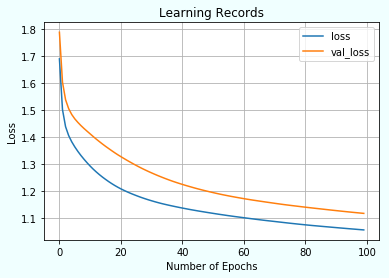

In [24]:
# Plot learning curves

dnn.plot_learning_record()

In [25]:
# Compute index values

dnn.compute_index_values(y_test, y_pred)

accuracy score: 0.8273


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:210: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


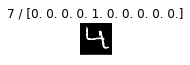

In [26]:
# Plot misclassifications

dnn.plot_misclassification(X_val, y_val, y_pred)